**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

**Loading processed US Home Prices dataset:**

In [ ]:
house_prices_df = pd.read_csv('processed_dataset.csv')
house_prices_df.set_index('DATE',inplace = True)
house_prices_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,Working_Population,Interest_Rate,Construction Price,New_House_Supply,CPI,Urban,Subsidies,median_income,Total_Households
DATE,,,,,,,,,,,,,
2000-01-01,100.551,2000.0,1.0,49335.000000,178203100.0,5.45,144.1,4.3,169.3,79.057,19.69,67470.0,104705.0
2000-02-01,101.339,2000.0,2.0,49593.000000,178283700.0,5.73,144.7,4.3,170.0,79.057,19.69,67470.0,104705.0
2000-03-01,102.127,2000.0,3.0,49851.000000,178367000.0,5.85,145.4,4.3,171.0,79.057,19.69,67470.0,104705.0
2000-04-01,102.922,2000.0,4.0,50109.000000,178534500.0,6.02,145.6,4.4,170.9,79.057,19.69,67470.0,104705.0
2000-05-01,103.677,2000.0,5.0,50080.666667,178771600.0,6.27,144.9,4.4,171.2,79.057,19.69,67470.0,104705.0


In [ ]:
#Dropping Year and Month column
house_prices_df.drop(['Year','Month'],axis = 1,inplace = True)

**Exploratory Data Analysis (EDA)**

Summary Statistics

We will calculate and display the summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values.


In [ ]:
summary = house_prices_df.describe()
summary

,CSUSHPISA,Per_Capita_GDP,Working_Population,Interest_Rate,Construction Price,New_House_Supply,CPI,Urban,Subsidies,median_income,Total_Households
count,276.000000,276.000000,2.760000e+02,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,171.876681,56430.847826,1.977135e+08,1.644457,203.825188,5.875725,223.024402,80.996696,32.956304,68614.782609,119526.086957
std,44.721710,4459.177854,8.567316e+06,1.867529,47.660065,1.948004,31.390079,1.199551,7.188200,4346.572688,7423.727359
min,100.551000,49335.000000,1.782031e+08,0.050000,141.700000,3.300000,169.300000,79.057000,19.690000,63350.000000,104705.000000
25%,142.138750,53513.500000,1.916440e+08,0.130000,171.300000,4.300000,198.100000,79.928000,27.651000,65760.000000,113343.000000
50%,165.857000,55470.000000,2.000736e+08,1.010000,202.650000,5.400000,225.100500,80.944000,33.213000,66780.000000,119927.000000
75%,188.170750,59444.500000,2.053608e+08,2.392500,220.025000,6.700000,244.004500,82.058000,37.550000,72090.000000,126224.000000
max,304.468000,65997.000000,2.075878e+08,6.540000,353.015000,12.200000,298.812000,83.084000,48.021000,78250.000000,131202.000000


**Correlation Matrix**

The values of the correlation matrix shows us the degree of linear dependence between the variables and helps us identify important feature for Linear Regression Model.

In [ ]:
#Correlation Matrix
corr_matrix = house_prices_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,Working_Population,Interest_Rate,Construction Price,New_House_Supply,CPI,Urban,Subsidies,median_income,Total_Households
CSUSHPISA,1.000000,0.922492,0.707834,-0.171314,0.914461,0.274537,0.858313,0.830505,0.874581,0.793891,0.802144
Per_Capita_GDP,0.922492,1.000000,0.873982,-0.327308,0.930474,0.192165,0.957958,0.959573,0.941789,0.804808,0.944963
Working_Population,0.707834,0.873982,1.000000,-0.585423,0.811506,0.299263,0.932364,0.940779,0.912086,0.524358,0.969181
Interest_Rate,-0.171314,-0.327308,-0.585423,1.000000,-0.384534,0.003270,-0.484460,-0.511267,-0.523296,0.002225,-0.544857
Construction Price,0.914461,0.930474,0.811506,-0.384534,1.000000,0.308722,0.954208,0.913798,0.934594,0.672050,0.885150
New_House_Supply,0.274537,0.192165,0.299263,0.003270,0.308722,1.000000,0.269964,0.183057,0.254336,0.009081,0.199490
CPI,0.858313,0.957958,0.932364,-0.484460,0.954208,0.269964,1.000000,0.985840,0.975037,0.679341,0.976967
Urban,0.830505,0.959573,0.940779,-0.511267,0.913798,0.183057,0.985840,1.000000,0.973825,0.726373,0.991122
Subsidies,0.874581,0.941789,0.912086,-0.523296,0.934594,0.254336,0.975037,0.973825,1.000000,0.704868,0.960867
median_income,0.793891,0.804808,0.524358,0.002225,0.672050,0.009081,0.679341,0.726373,0.704868,1.000000,0.671518


Visualizing correlation matrix through heatmap to clearly identify high and low correlations

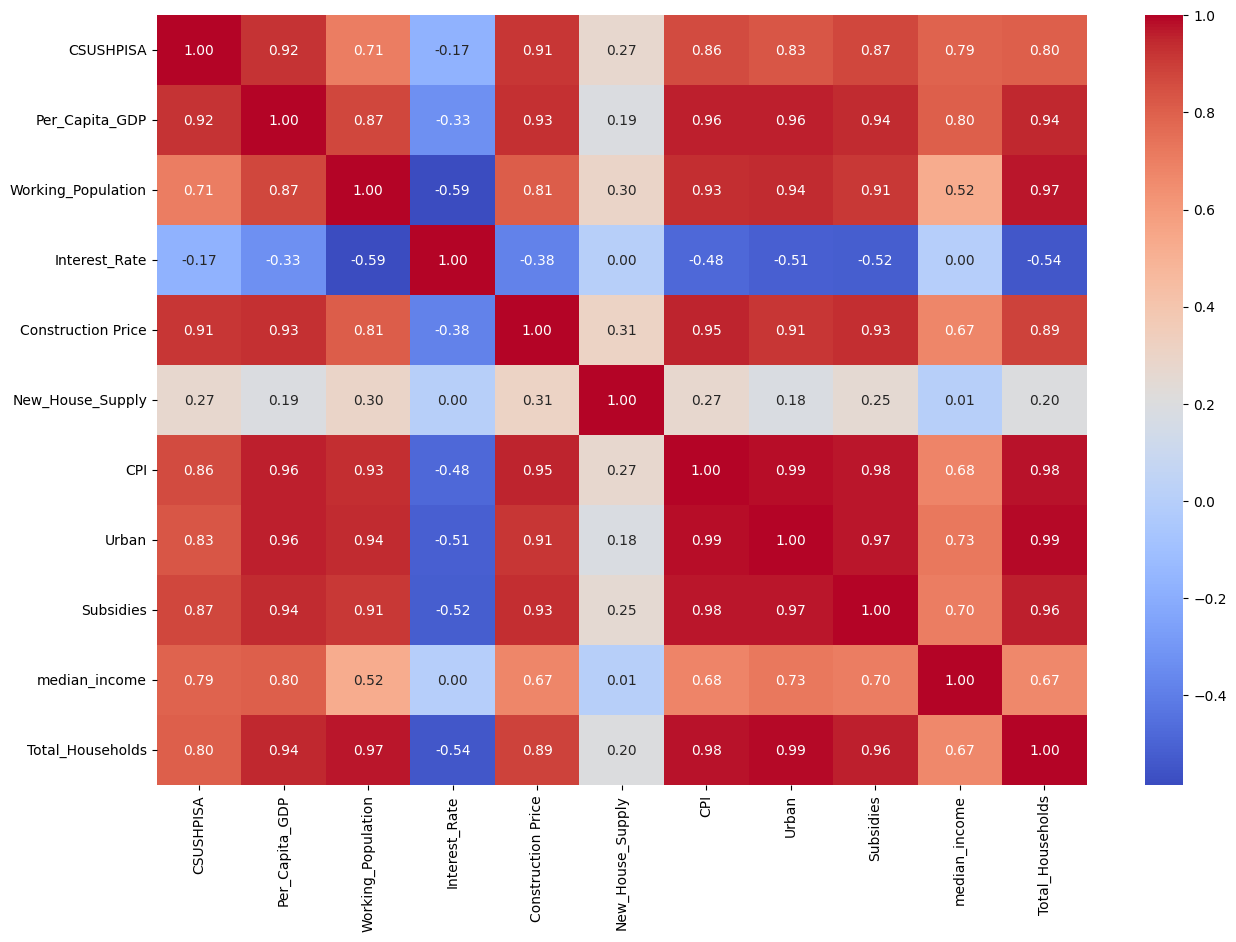

In [ ]:
#Using heatmap to visulize the feautres correlation
plt.figure(figsize = (15,10))
sns.heatmap(corr_matrix,annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

**Data Visualization**

Plotting the features in pair to understand distribution and trends in data.

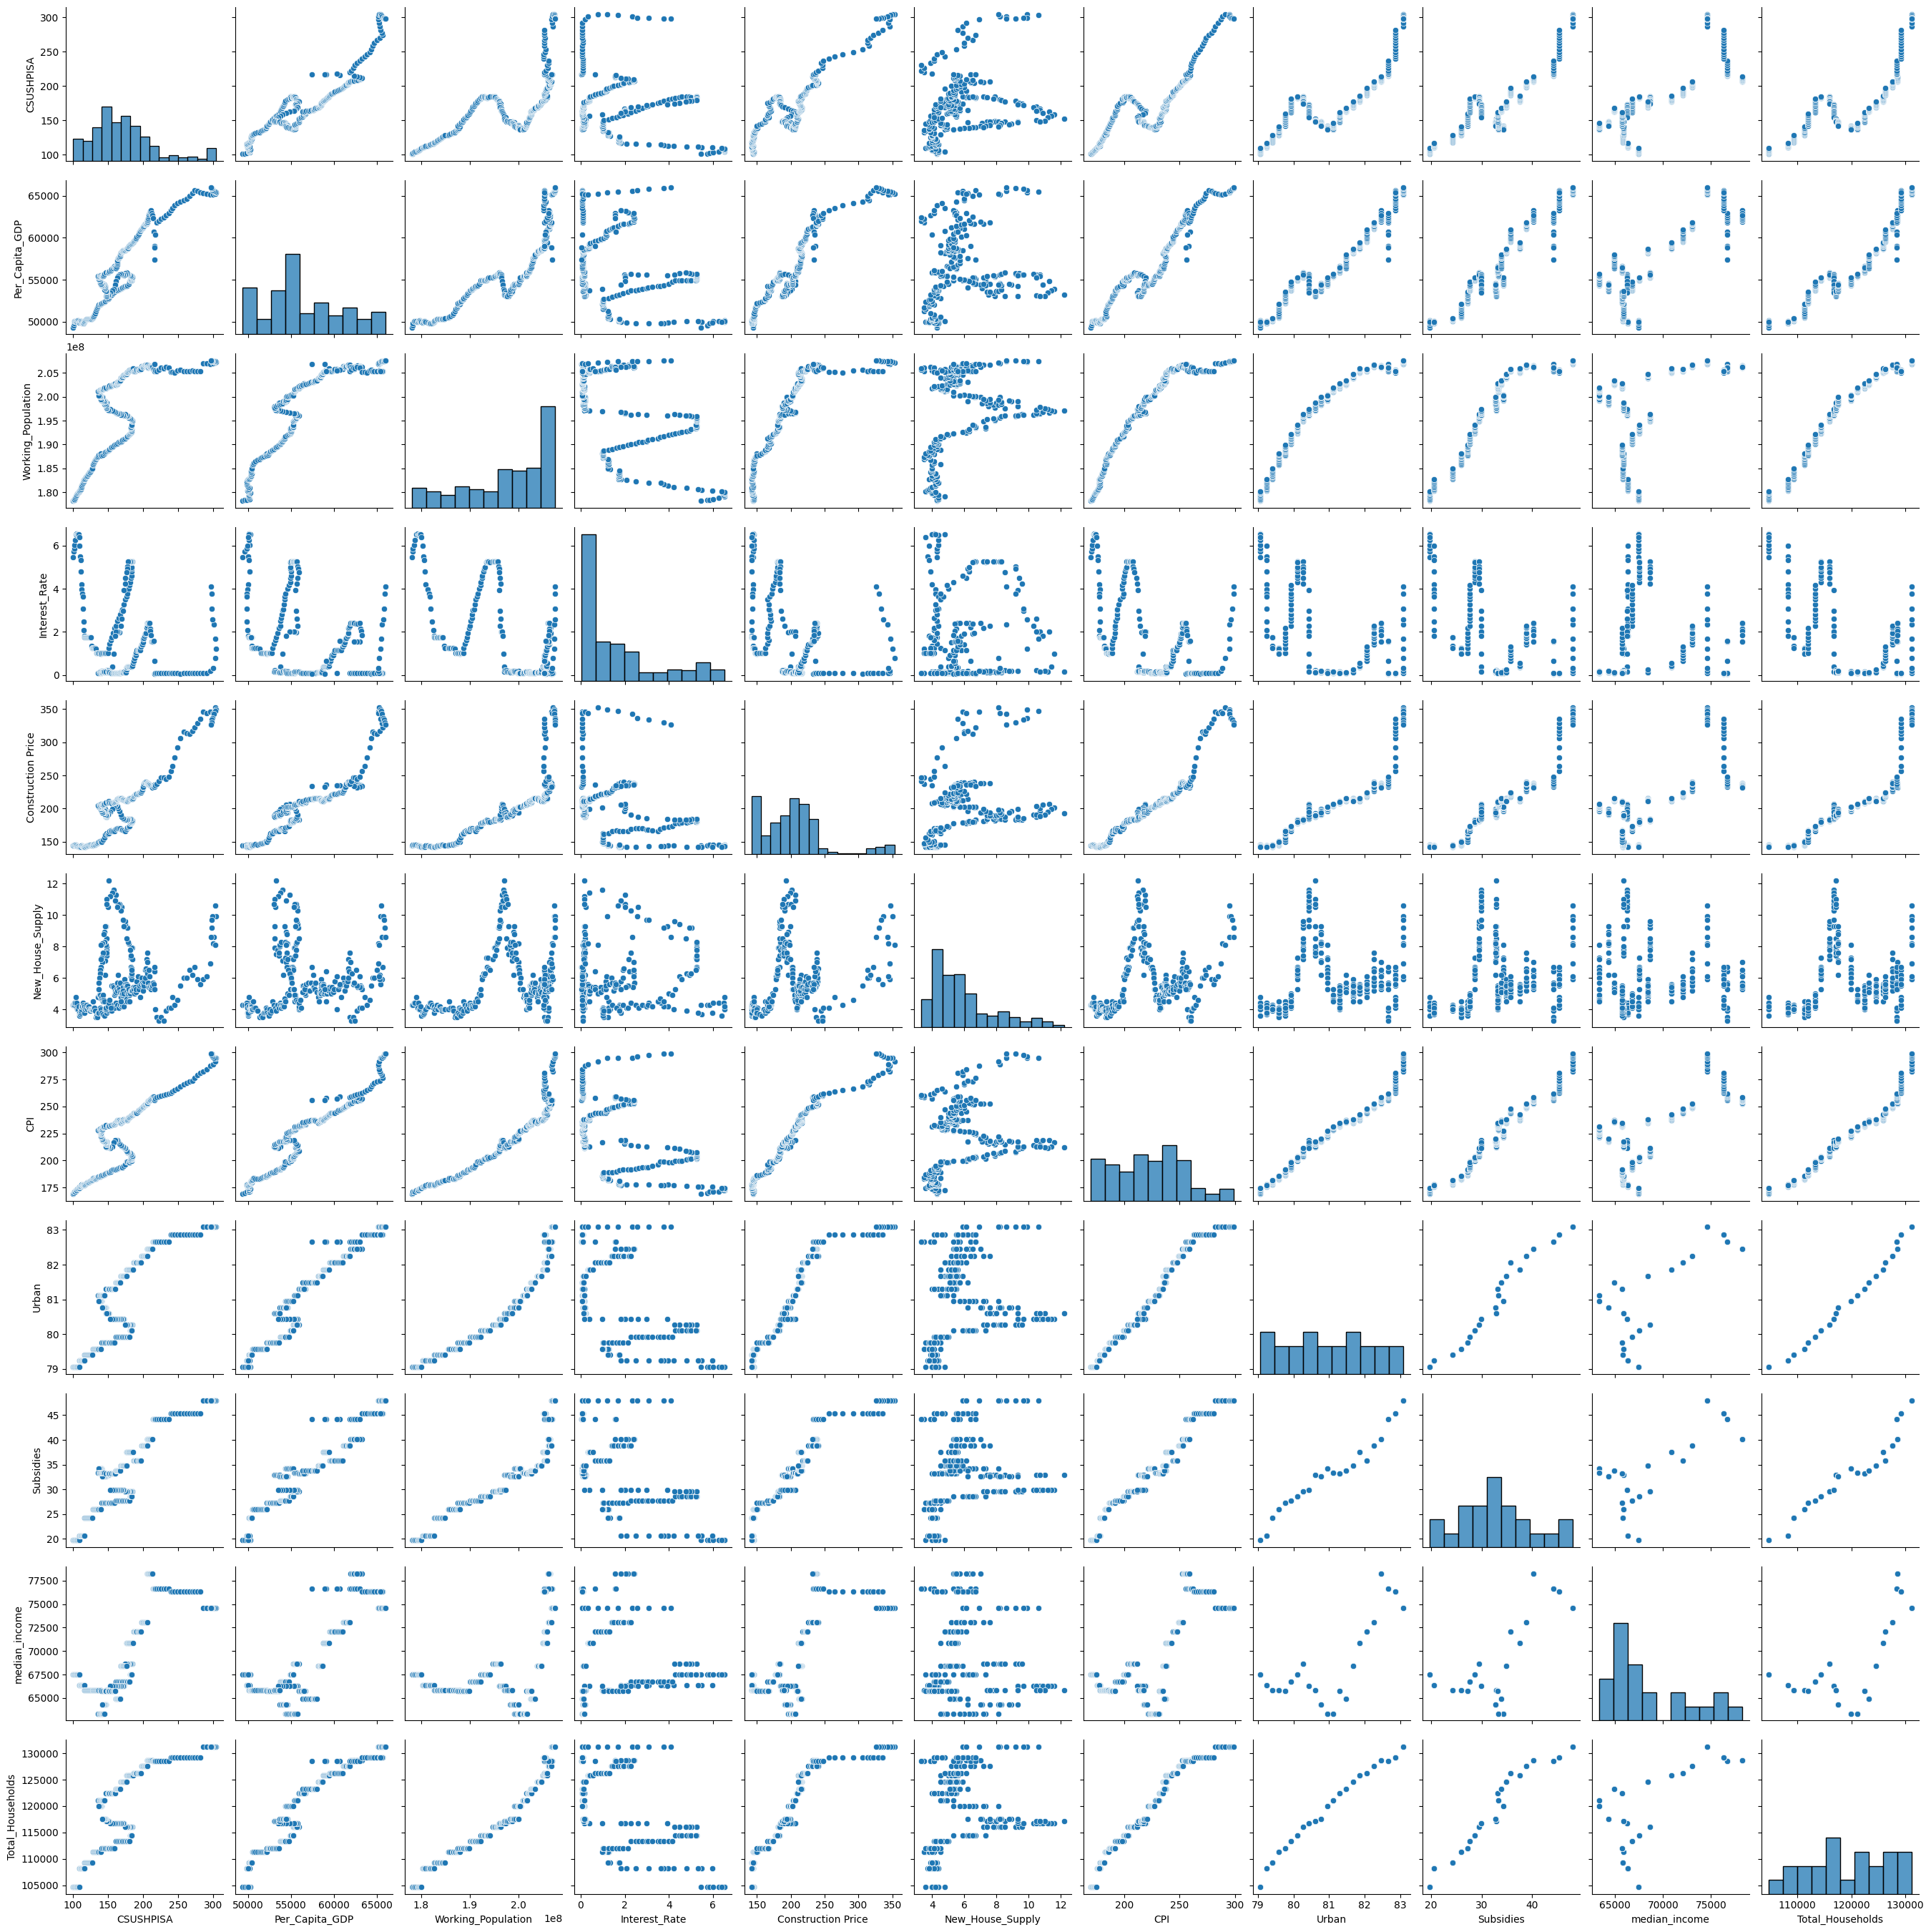

In [ ]:
# Visualising Data
sns.pairplot(house_prices_df)
plt.show()

**Time Series Decomposition**

For time-dependent variables such as 'CSUSHPISA' (S&P Case-Shiller U.S. National Home Price Index), we can use time series decomposition to break down the data into its trend, seasonal, and residual components. Plotting these components helps in understanding the underlying patterns over time.




*   The trend component shows the overall nature of growth in US home prices.
*   The seasonal componment shows the repetitive or recurrent patterns in the data
*   The residual component shows the noise present in the data







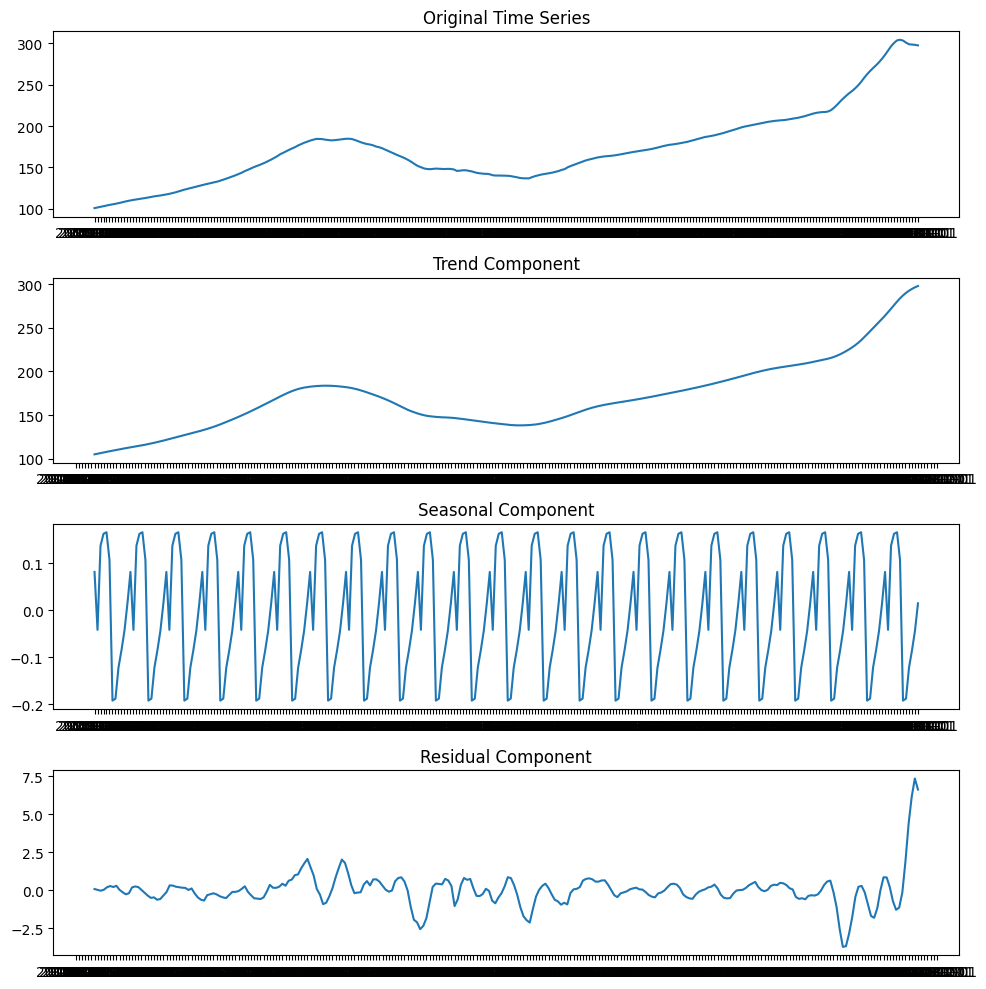

In [ ]:
#Analyzing  time series (trends, repetive patterns and noise)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Decompose time series
result = seasonal_decompose(house_prices_df['CSUSHPISA'], model='additive',period=12)
trend_component =result.trend
seasonal_component = result.seasonal
residual_component = result.resid

#Plotting
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
axes[0].plot(house_prices_df['CSUSHPISA'])
axes[0].set_title('Original Time Series')

axes[1].plot(trend_component)
axes[1].set_title('Trend Component')
axes[2].plot(seasonal_component)
axes[2].set_title('Seasonal Component')

axes[3].plot(residual_component)
axes[3].set_title('Residual Component')

plt.tight_layout()


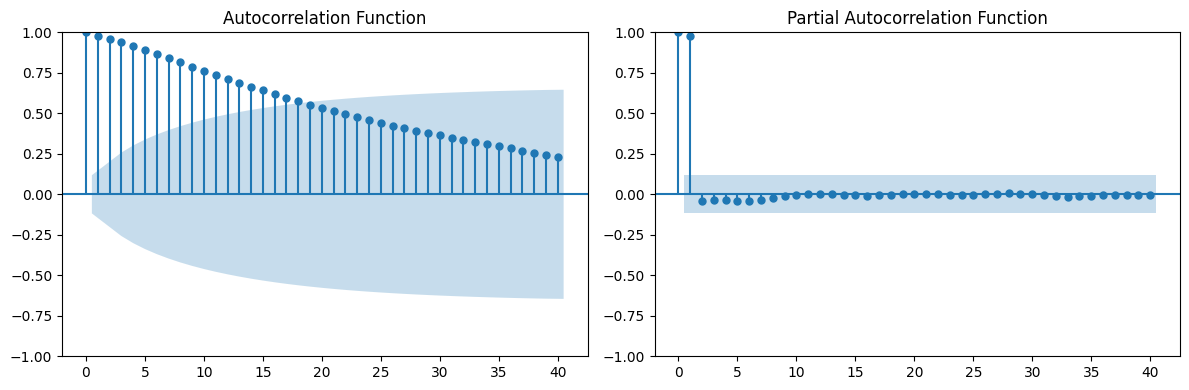

In [ ]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(house_prices_df['CSUSHPISA'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Function')

plot_pacf(house_prices_df['CSUSHPISA'], lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

**Extract features and target variable**

In [ ]:
X = house_prices_df.drop('CSUSHPISA', axis=1)
y = house_prices_df['CSUSHPISA']

**Correlation matrix coeffecients**

In [ ]:
# Calculate the absolute correlation of each feature with the target variable
correlations = X.apply(lambda column: np.abs(column.corr(y)))
sort_correlations = correlations.sort_values(ascending=False)
sort_correlations

Per_Capita_GDP        0.922492
Construction Price    0.914461
Subsidies             0.874581
CPI                   0.858313
Urban                 0.830505
Total_Households      0.802144
median_income         0.793891
Working_Population    0.707834
New_House_Supply      0.274537
Interest_Rate         0.171314
dtype: float64

**Correlation Analysis Summary:**

  **Strongest Correlations:**

  The feature exhibiting the strongest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP,' which has a correlation coefficient of 0.922492. This indicates a robust positive linear relationship with home prices.

  'Construction Price' shows a significant positive correlation with a coefficient of 0.914461.

  **Other Notable Correlations:**

'Subsidy' has a strong positive correlation of 0.874581.

'Consumer Price Index (CPI)' also correlates positively with a coefficient of 0.858313.

'Urban' exhibits a strong positive correlation of 0.830505.

'Total_Households' has a positive correlation of 0.802144.

**Moderate Correlations:**

'median_income' shows a moderate positive correlation of 0.793891.








**Data Science models**

We will build various Data Science Models: Linear Regression, Neural Network Model and Random Forest Linear Regressor Model and will identify the best model with lower loss and high r-squared value.

We will drop the columns with low correlations and target column

In [ ]:
#Building Linear Regression model
# Dropping features with low correlation value
house_prices_df.drop(columns=['Interest_Rate','New_House_Supply','Working_Population','CSUSHPISA'], inplace=True)
house_prices_df.head()


,Per_Capita_GDP,Construction Price,CPI,Urban,Subsidies,median_income,Total_Households
DATE,,,,,,,
2000-01-01,49335.000000,144.1,169.3,79.057,19.69,67470.0,104705.0
2000-02-01,49593.000000,144.7,170.0,79.057,19.69,67470.0,104705.0
2000-03-01,49851.000000,145.4,171.0,79.057,19.69,67470.0,104705.0
2000-04-01,50109.000000,145.6,170.9,79.057,19.69,67470.0,104705.0
2000-05-01,50080.666667,144.9,171.2,79.057,19.69,67470.0,104705.0


**Data Pre-Processing**

In [ ]:
X = house_prices_df
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train.columns

Index(['Per_Capita_GDP', 'Construction Price', 'CPI', 'Urban', 'Subsidies',
       'median_income', 'Total_Households'],
      dtype='object')

**Linear Regression Model**

In [ ]:
#Train the Model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

#Predict on test set
y_pred = regressor.predict(X_test_scaled)

#Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print out the coefficients
print('Coefficients:')
if hasattr(X_train_scaled, 'columns'):
    for feature, coef in zip(X_train_scaled.columns, regressor.coef_):
        print(f'{feature}: {coef}')
else:
    # If X_train_scaled doesn't have columns attribute, use a placeholder
    for i, coef in enumerate(regressor.coef_):
        print(f'Feature {i}: {coef}')

Mean Squared Error: 91.7597298233004
R-squared: 0.9476422614129923
Coefficients:
Feature 0: 35.54341887605083
Feature 1: 21.213384019297127
Feature 2: 7.13320787962794
Feature 3: -95.87970315100384
Feature 4: 35.99351172506535
Feature 5: 13.291186671324214
Feature 6: 28.414483751529026


Linear Regression Model gives us mean squared error (mse): 91.7597298233004 and R-squared value: 0.9476422614129923.


**Building and Training Neural Network(5 layers)**

The neural network is a complex model. The first layer is the input layer which has dimension of input features.

The second layer has dimension of 64.

The third layer has dimension of 32

The fourth layer has dimension of 16

The fifth and the final layer is the output layer which gives a single answer(prediction) with dimension 1.

The loss function is the mean squared error function and the activation layer after every layer is 'relu'.

In [ ]:
#Implementing Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,r2_score

#Defining Neural Network Model
def nn_model(input_dim):
    # 3 hidden layers
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error')
    return model

#Creating model
input_dim = X_train_scaled.shape[1]
model = nn_model(input_dim)

#Train the model
train_detail = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)


Epoch 1/500
6/6 [==============================] - 1s 40ms/step - loss: 31108.7891 - val_loss: 35509.2188
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 30901.5820 - val_loss: 35247.0352
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 30615.9492 - val_loss: 34859.3594
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 30202.9316 - val_loss: 34255.9102
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 29551.0938 - val_loss: 33297.0312
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 28484.6074 - val_loss: 31802.3809
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 26926.1484 - val_loss: 29521.5918
Epoch 8/500
6/6 [==============================] - 0s 8ms/step - loss: 24552.9629 - val_loss: 26336.7734
Epoch 9/500
6/6 [==============================] - 0s 8ms/step - loss: 21412.4004 - val_loss: 22050.9355
Epoch 10/500
6/6 [==============================] -

In [ ]:
y_pred = model.predict(X_test_scaled)
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

2/2 [==============================] - 0s 5ms/step
Mean Squared Error: 12.934694398861648
R-squared: 0.9926195145807146


**Random Forest Regressor**

In [ ]:
#Random forest Model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Training the model
rf_model.fit(X_train_scaled, y_train)

#Predicting on test set
y_pred = rf_model.predict(X_test_scaled)

#Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.5337592863302367
R-squared: 0.9979836509403485


In [ ]:
#Deciding important features
important_features = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(important_features)

                    Importance
Construction Price    0.320882
CPI                   0.306665
Subsidies             0.102811
median_income         0.096544
Per_Capita_GDP        0.086370
Urban                 0.057490
Total_Households      0.029238


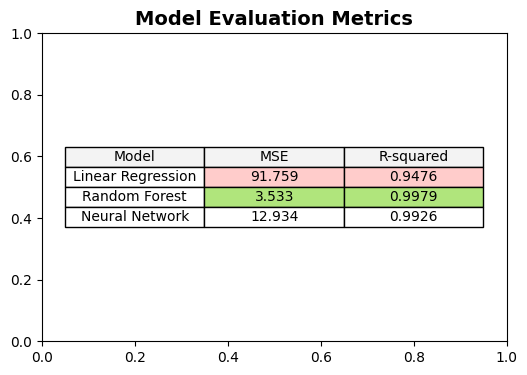

In [ ]:
# Create a DataFrame with model names and evaluation metrics
data = {
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network'],
    'MSE': [91.759, 3.533, 12.934],
    'R-squared': [0.9476,  0.9979, 0.9926]
}

df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 4))

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f3f3f3'] * len(df.columns),
    colWidths=[0.25] * len(df.columns)
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust table size

# Highlight minimum and maximum MSE
min_mse_index = df['MSE'].idxmin()
max_mse_index = df['MSE'].idxmax()

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index and j == df.columns.get_loc('MSE')) or (i == max_mse_index and j == df.columns.get_loc('MSE')):
            color = '#b0e57c' if i == min_mse_index else '#ffcccb'  # Light green for min MSE and light red for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight minimum and maximum R-squared
min_r2_index = df['R-squared'].idxmin()
max_r2_index = df['R-squared'].idxmax()

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index and j == df.columns.get_loc('R-squared')) or (i == max_r2_index and j == df.columns.get_loc('R-squared')):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min R-squared and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

# Add title
plt.title('Model Evaluation Metrics', fontsize=14, fontweight='bold')
plt.show()

**Outcome:**

**Low MSE** value means the the model predictions are accurate.

**High R-squared value** signifies that the trends in data can be explained by the selected model.

**Random Forest** and **Neural Network Model** appear to be best predictor model as they have **low mean square error and high r-squared value**.

**Neural Network Model** has slightly high mse value and is more complex and need more computation(1000 epochs) which makes Random Forest Regressor model the best performing model for U.S. house price prediction.

**Linear Regression** has high mean squared error which makes it less accurate in prediction over the test dataset despite its high r-squared value.

**Best Model:** The **Random Forest regressor model** is the best performing model having high **r-squared value of 0.9979836509403485** and low **mean squared error of 3.5337592863302367**.

**Important Features**: The features such as Construction Price, CPI, Subsidies, median_income and Per Capita GDP are the most important features.

Increase in the **Construction Material Prices would greatly influence the U.S. house prices** and so does the Consumer Price Index which is indicative of period of inflation.

The **correlation matrix** calculated during EDA also shows the same features as most important.

